In [1]:
import json
import requests
import tldextract
from bs4 import BeautifulSoup
import pandas as pd
import tqdm
import math
import random

In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [10]:
domains_meta = {}
with open("largedata/aylien_covid_news_data.jsonl", "r") as f:
    for i, line in tqdm.tqdm(enumerate(f)):
        line = json.loads(line)
        
        country = line["source"]["locations"][0]["country"] if len(line["source"]["locations"]) > 0 else "??"
        if country != "US":
            continue

        domain = line["source"]["domain"]
        
        ranking_list = line["source"]["rankings"]["alexa"]
        ranking_list = [r for r in ranking_list if r["country"] == "US"]
        if ranking_list:
            ranking = ranking_list[0]["rank"]
        else:
            ranking = math.inf
        
        shares_fb = line["social_shares_count"]["facebook"][0]["count"] if line["social_shares_count"]["facebook"] else 0
        shares_reddit = line["social_shares_count"]["reddit"][0]["count"] if line["social_shares_count"]["reddit"] else 0
        
        if domain in domains_meta:
            domains_meta[domain]["articles"] += 1
            domains_meta[domain]["shares_fb"] += shares_fb
            domains_meta[domain]["shares_reddit"] += shares_reddit
            domains_meta[domain]["ranking"] = min(domains_meta[domain]["ranking"], ranking)
        else:
            domains_meta[domain] = {
                "domain": domain,
                "shares_fb": shares_fb,
                "shares_reddit": shares_reddit,
                "ranking": ranking,
                "articles": 1,
            }

1673353it [06:48, 4093.57it/s]


In [11]:
domains_meta

{'complex.com': {'domain': 'complex.com',
  'shares_fb': 3036204,
  'shares_reddit': 35867,
  'ranking': 1177,
  'articles': 1789},
 'slate.com': {'domain': 'slate.com',
  'shares_fb': 2264897,
  'shares_reddit': 2759,
  'ranking': 893,
  'articles': 1466},
 'cbsnews.com': {'domain': 'cbsnews.com',
  'shares_fb': 29236779,
  'shares_reddit': 1088260,
  'ranking': 254,
  'articles': 8681},
 'dailycaller.com': {'domain': 'dailycaller.com',
  'shares_fb': 17733254,
  'shares_reddit': 49877,
  'ranking': 952,
  'articles': 6265},
 'usnews.com': {'domain': 'usnews.com',
  'shares_fb': 360060,
  'shares_reddit': 12797,
  'ranking': 228,
  'articles': 6907},
 'businessinsider.com': {'domain': 'businessinsider.com',
  'shares_fb': 55376138,
  'shares_reddit': 4999649,
  'ranking': 103,
  'articles': 19865},
 'yahoo.com': {'domain': 'yahoo.com',
  'shares_fb': 1469172,
  'shares_reddit': 77145,
  'ranking': 7,
  'articles': 3924},
 'foxnews.com': {'domain': 'foxnews.com',
  'shares_fb': 1040647

In [31]:
domains_df = pd.DataFrame(list(domains_meta.values()))
domains_df["shares_fb_mean"] = domains_df.shares_fb / domains_df.articles
domains_df["shares_reddit_mean"] = domains_df.shares_reddit / domains_df.articles
domains_df = domains_df.sort_values(by="shares_fb_mean", ascending=False)
domains_df = domains_df.reset_index(drop=True)
domains_df.to_csv("data/aylien_domains.csv", index=False)
domains_df

,domain,shares_fb,shares_reddit,ranking,articles,shares_fb_mean,shares_reddit_mean
0,nbcnews.com,175124097,1245486,189.0,7692,22767.043292,161.919657
1,tmz.com,15684007,59826,364.0,1027,15271.671860,58.253165
2,cnn.com,218361671,947189,24.0,17765,12291.678638,53.317703
3,nytimes.com,1593085,9204,29.0,142,11218.908451,64.816901
4,rollingstone.com,17052713,702338,625.0,1922,8872.379292,365.420395
...,...,...,...,...,...,...,...
134,intel.com,0,0,926.0,12,0.000000,0.000000
135,investopedia.com,0,0,289.0,2,0.000000,0.000000
136,weather.gov,0,0,190.0,2,0.000000,0.000000
137,msu.edu,0,0,1031.0,15,0.000000,0.000000


In [3]:
domains_df = pd.read_csv("data/aylien_domains.csv")

In [10]:
domains_meta = {row.domain: row for i,row in domains_df.iterrows()}

In [8]:
selected_domains = domains_df.domain.to_list()
selected_domains

['nbcnews.com',
 'tmz.com',
 'cnn.com',
 'nytimes.com',
 'rollingstone.com',
 'npr.org',
 'newyorker.com',
 'google.com',
 'huffingtonpost.com',
 'buzzfeed.com',
 'theatlantic.com',
 'thehill.com',
 'politico.com',
 'foxnews.com',
 'variety.com',
 'nypost.com',
 'vox.com',
 'ew.com',
 'go.com',
 'pbs.org',
 'cnbc.com',
 'cbsnews.com',
 'bloomberg.com',
 'usatoday.com',
 'newsweek.com',
 'dailycaller.com',
 'businessinsider.com',
 'snopes.com',
 'hbr.org',
 'washingtonpost.com',
 'vice.com',
 'apnews.com',
 'thedailybeast.com',
 'buzzorange.com',
 'vanityfair.com',
 'complex.com',
 'forbes.com',
 'aol.com',
 'nydailynews.com',
 'slate.com',
 'fivethirtyeight.com',
 'pitchfork.com',
 'latimes.com',
 'reuters.com',
 'wired.com',
 'breitbart.com',
 'chron.com',
 'delta.com',
 'theadvocate.com',
 'cbslocal.com',
 'avclub.com',
 'deadline.com',
 'virginia.edu',
 'cbssports.com',
 'denverpost.com',
 'menshealth.com',
 'apple.com',
 'mashable.com',
 'cosmopolitan.com',
 'chicagotribune.com',
 

In [11]:
n_selected_articles = 0
for d in selected_domains:
    n_selected_articles += domains_meta[d]["articles"]
n_selected_articles

435849

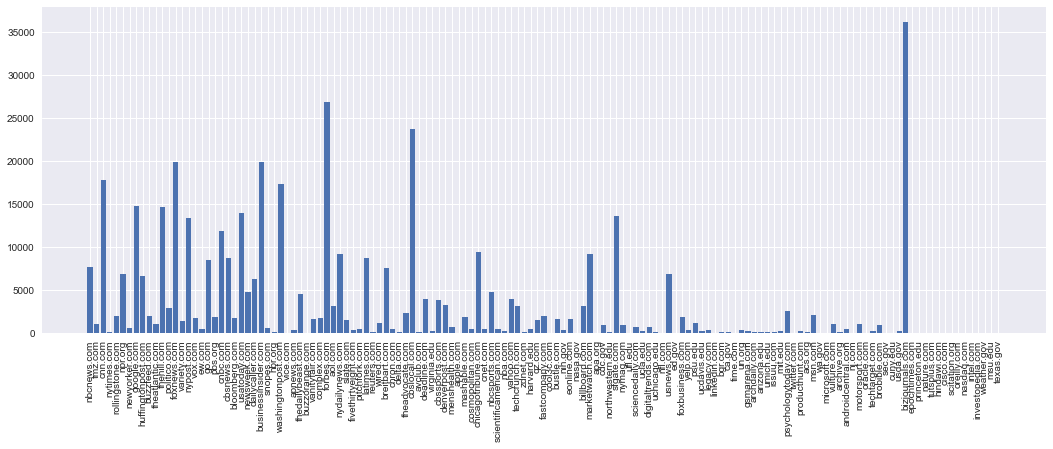

In [12]:
plt.figure(figsize=(18,6))
plt.bar(
    x=selected_domains,
    height=[domains_meta[d]["articles"] for d in selected_domains],
)
plt.xticks(rotation=90)
plt.show()

In [17]:
MAX_ARTICLES = 500

In [18]:
n_selected_articles = 0
for d in selected_domains:
    n_selected_articles += min(MAX_ARTICLES, domains_meta[d]["articles"])
n_selected_articles

43872

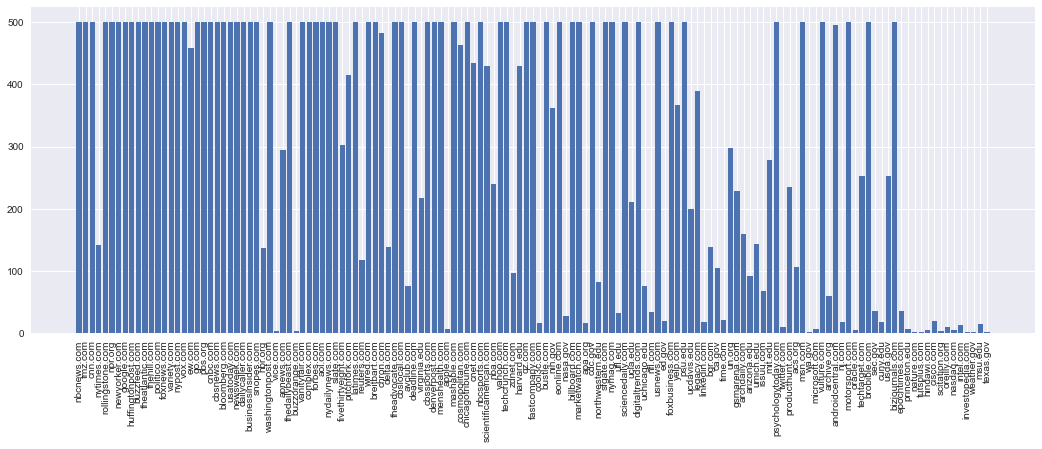

In [19]:
plt.figure(figsize=(18,6))
plt.bar(
    x=selected_domains,
    height=[min(MAX_ARTICLES, domains_meta[d]["articles"]) for d in selected_domains],
)
plt.xticks(rotation=90)
plt.show()

In [20]:
selected_domains_ind = {d: [] for d in selected_domains}
with open("largedata/aylien_covid_news_data.jsonl", "r") as f:
    for i, line in tqdm.tqdm(enumerate(f)):
        line = json.loads(line)
        domain = line["source"]["domain"]
        if domain in selected_domains:
            selected_domains_ind[domain].append(i)

1673353it [05:52, 4749.43it/s]


In [21]:
flatten = lambda t: [item for sublist in t for item in sublist]

In [22]:
selected_articles_ind = {k: (v if len(v) <= MAX_ARTICLES else random.sample(v, MAX_ARTICLES)) for k,v in selected_domains_ind.items()}
selected_articles_ind_all = sorted(flatten(selected_articles_ind.values()))

In [23]:
selected_articles_ind_all

[15,
 44,
 168,
 192,
 244,
 259,
 317,
 353,
 381,
 392,
 442,
 484,
 575,
 605,
 621,
 661,
 664,
 665,
 686,
 722,
 726,
 738,
 771,
 792,
 806,
 811,
 837,
 892,
 945,
 975,
 1016,
 1023,
 1026,
 1040,
 1063,
 1072,
 1084,
 1117,
 1207,
 1367,
 1405,
 1484,
 1509,
 1553,
 1730,
 1765,
 1769,
 1853,
 1909,
 1941,
 1970,
 1972,
 2027,
 2051,
 2095,
 2102,
 2174,
 2194,
 2197,
 2298,
 2331,
 2337,
 2387,
 2503,
 2513,
 2530,
 2612,
 2713,
 2985,
 3032,
 3035,
 3140,
 3225,
 3258,
 3259,
 3327,
 3398,
 3409,
 3469,
 3473,
 3606,
 3652,
 3667,
 3706,
 3720,
 3724,
 3748,
 3792,
 3815,
 3861,
 3874,
 3889,
 3904,
 4034,
 4171,
 4175,
 4215,
 4297,
 4327,
 4369,
 4424,
 4459,
 4500,
 4551,
 4724,
 4734,
 4736,
 4737,
 4738,
 4839,
 4850,
 4922,
 4966,
 4985,
 4990,
 4995,
 5090,
 5115,
 5120,
 5143,
 5146,
 5185,
 5193,
 5194,
 5240,
 5279,
 5290,
 5326,
 5336,
 5415,
 5416,
 5437,
 5494,
 5598,
 5604,
 5605,
 5711,
 5768,
 5781,
 5787,
 5802,
 5810,
 5950,
 5973,
 6248,
 6249,
 6265,
 62

In [24]:
len(selected_articles_ind_all)

48087

In [25]:
with open("data/aylien_selected_articles_ind_v2.json", "w") as f:
    json.dump(selected_articles_ind_all, f)